# Analysis_2  disaster of Titanic
## To find the highest rate of survived female by ageband

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Load data

In [5]:
raw_data = pd.read_csv('..\data\Titanic.csv',na_values='N/A')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#deal with null values
raw_data['Embarked'] = raw_data['Embarked'].fillna('S')
raw_data.drop('Cabin',axis=1,inplace=True)
raw_data.Age=raw_data['Age'].fillna(raw_data['Age'].mean())

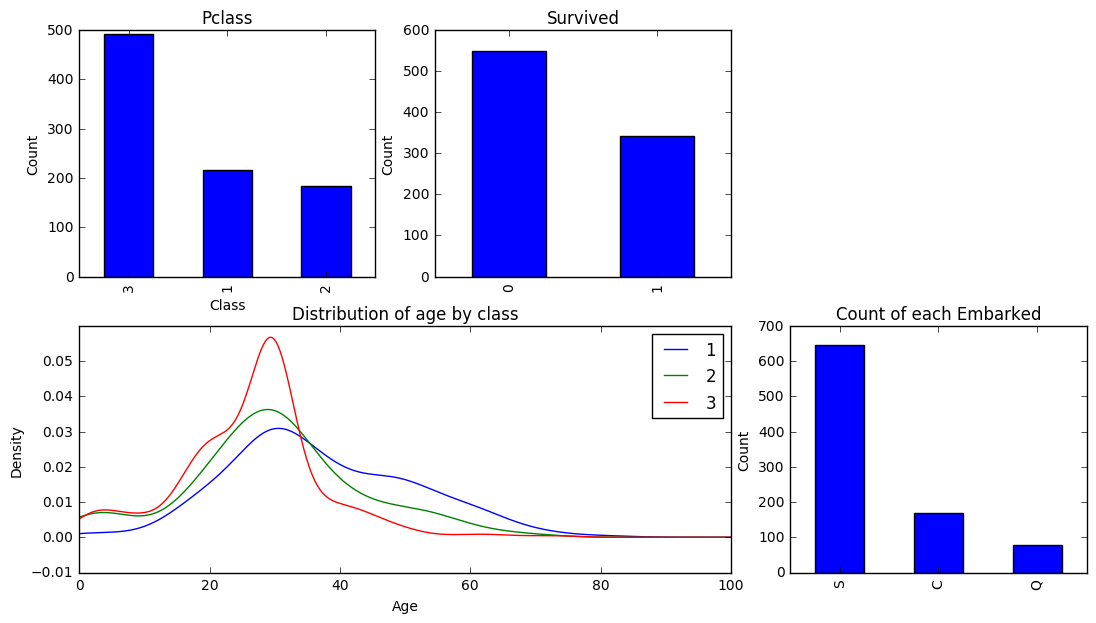

In [8]:
fig = plt.figure(figsize=(13,7))
fig.set(alpha = 0.2)
#to draw many pictures in one plot
#first one is about the count of Pclass 
plt.subplot2grid((2,3),(0,0))
raw_data.Pclass.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Pclass')

#Second one is about the count of Survived
plt.subplot2grid((2,3),(0,1))
raw_data.Survived.value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Survived')

#Third one is about the distribution of age in class
plt.subplot2grid((2,3),(1,0),colspan=2)
raw_data.Age[raw_data.Pclass==1].plot(kind='kde')
raw_data.Age[raw_data.Pclass==2].plot(kind='kde')
raw_data.Age[raw_data.Pclass==3].plot(kind='kde')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of age by class')
plt.ylim(-0.01)
plt.xlim(0,100)
plt.legend(('1','2','3'),loc='best')

#Last one is about the count of each Embarked
plt.subplot2grid((2,3),(1,2))
raw_data.Embarked.value_counts().plot(kind='bar')
plt.title('Count of each Embarked')
plt.ylabel("Count")
plt.savefig('ana_2_multiple.png')


In [21]:
deal_data = raw_data[['Survived','Sex','Age']]
deal_data.head()

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0


In [22]:
#delete data which sex is male
female_data = deal_data[deal_data.Sex == 'female']
# deal with null value of Age
female_data.Age= female_data['Age'].fillna(female_data['Age'].mean())
female_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Survived,Sex,Age
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
8,1,female,27.0
9,1,female,14.0


In [23]:
female_data.isnull().sum()

Survived    0
Sex         0
Age         0
dtype: int64

In [24]:
# Change the type of Age into str
# female_data.dtypes
# Change the type of Age into str
female_data['Age']=female_data['Age'].astype(int)
female_data.head()


E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Sex,Age
1,1,female,38
2,1,female,26
3,1,female,35
8,1,female,27
9,1,female,14


## Analysis begin

In [25]:
#To divide age into 3 band(bins)
female_data['AgeBand_3'] = pd.cut(female_data['Age'],3)
female_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Survived,Sex,Age,AgeBand_3
1,1,female,38,"(21, 42]"
2,1,female,26,"(21, 42]"
3,1,female,35,"(21, 42]"
8,1,female,27,"(21, 42]"
9,1,female,14,"(-0.063, 21]"


In [26]:
final_data_3= female_data[['AgeBand_3','Survived']].groupby(['AgeBand_3'],as_index=False).mean().sort_values(by='AgeBand_3',ascending=True)
final_data_3

,AgeBand_3,Survived
0,"(-0.063, 21]",0.678571
1,"(21, 42]",0.761905
2,"(42, 63]",0.780488


In [27]:
#To divide age into 5 band(bins)
female_data['AgeBand_5'] = pd.cut(female_data['Age'],5)
female_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Survived,Sex,Age,AgeBand_3,AgeBand_5
1,1,female,38,"(21, 42]","(37.8, 50.4]"
2,1,female,26,"(21, 42]","(25.2, 37.8]"
3,1,female,35,"(21, 42]","(25.2, 37.8]"
8,1,female,27,"(21, 42]","(25.2, 37.8]"
9,1,female,14,"(-0.063, 21]","(12.6, 25.2]"


In [28]:
final_data_5= female_data[['AgeBand_5','Survived']].groupby(['AgeBand_5'],as_index=False).mean().sort_values(by='AgeBand_5',ascending=True)
final_data_5

,AgeBand_5,Survived
0,"(-0.063, 12.6]",0.593750
1,"(12.6, 25.2]",0.755556
2,"(25.2, 37.8]",0.755906
3,"(37.8, 50.4]",0.708333
4,"(50.4, 63]",0.941176


In [29]:
female_data['AgeBand_7'] = pd.cut(female_data['Age'],7)
female_data.head()

E:\Anaconda3\envs\NEUPython\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Survived,Sex,Age,AgeBand_3,AgeBand_5,AgeBand_7
1,1,female,38,"(21, 42]","(37.8, 50.4]","(36, 45]"
2,1,female,26,"(21, 42]","(25.2, 37.8]","(18, 27]"
3,1,female,35,"(21, 42]","(25.2, 37.8]","(27, 36]"
8,1,female,27,"(21, 42]","(25.2, 37.8]","(18, 27]"
9,1,female,14,"(-0.063, 21]","(12.6, 25.2]","(9, 18]"


In [30]:
final_data_7= female_data[['AgeBand_7','Survived']].groupby(['AgeBand_7'],as_index=False).mean().sort_values(by='AgeBand_7',ascending=True)
final_data_7

,AgeBand_7,Survived
0,"(-0.063, 9]",0.633333
1,"(9, 18]",0.710526
2,"(18, 27]",0.753846
3,"(27, 36]",0.765217
4,"(36, 45]",0.666667
5,"(45, 54]",0.850000
6,"(54, 63]",0.900000


In [31]:
female_data[female_data['Age'] > 50]

,Survived,Sex,Age,AgeBand_3,AgeBand_5,AgeBand_7
11,1,female,58,"(42, 63]","(50.4, 63]","(54, 63]"
15,1,female,55,"(42, 63]","(50.4, 63]","(54, 63]"
195,1,female,58,"(42, 63]","(50.4, 63]","(54, 63]"
268,1,female,58,"(42, 63]","(50.4, 63]","(54, 63]"
275,1,female,63,"(42, 63]","(50.4, 63]","(54, 63]"
366,1,female,60,"(42, 63]","(50.4, 63]","(54, 63]"
483,1,female,63,"(42, 63]","(50.4, 63]","(54, 63]"
496,1,female,54,"(42, 63]","(50.4, 63]","(45, 54]"
513,1,female,54,"(42, 63]","(50.4, 63]","(45, 54]"
571,1,female,53,"(42, 63]","(50.4, 63]","(45, 54]"
